<a href="https://colab.research.google.com/github/charithrd/Python-E-Learning/blob/main/UD_T6_advanced_text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Text Analytics & Applications

## Learning Objectives
* Understand and apply Natural Language Processing concepts
* Create effective text visualisations
* Perform sentiment analysis on real text data
* Build practical text analytics solutions

## Part 1: Natural Language Processing Concepts

Let's set up our environment with the required libraries:

In [2]:
%pip install -r ../requirements.txt nltk spacy textblob wordcloud
!python -m spacy download en_core_web_sm

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
%pip install -r requirements.txt nltk spacy textblob wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import nltk
import spacy
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('punkt_tab')
nltk.download('words')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

print("Environment ready!")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Environment ready!


### 1.1 Part-of-Speech Tagging

POS tagging helps identify the role of each word in a sentence:

In [2]:
def analyse_pos(text):
    # Tokenise and tag
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)

    # Create readable output
    pos_dict = {
        'NNP': 'Proper Noun',
        'NN': 'Noun',
        'VB': 'Verb',
        'JJ': 'Adjective',
        'RB': 'Adverb'
    }

    return [(word, pos_dict.get(tag[:2], tag)) for word, tag in tagged]

# Example text
text = "Data Science helps companies make better decisions quickly."

pos_results = analyse_pos(text)
print("Part of Speech Analysis:")
for word, pos in pos_results:
    print(f"{word}: {pos}")

Part of Speech Analysis:
Data: Noun
Science: Noun
helps: Verb
companies: Noun
make: Verb
better: Adjective
decisions: Noun
quickly: Adverb
.: .


### 1.2 Named Entity Recognition (NER)

NER identifies entities like names, organisations, and locations:

In [3]:
def extract_entities(text):
    # Process with spaCy
    doc = nlp(text)

    # Extract entities
    entities = {
        'ORG': [],
        'PERSON': [],
        'DATE': [],
        'GPE': []  # Geographical/Political Entities
    }

    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)

    return entities

# Example text
text = """Microsoft announced new AI features in February 2024.
Sarah Johnson from Google presented at the London conference."""

entities = extract_entities(text)
print("Named Entities Found:")
for entity_type, items in entities.items():
    if items:
        print(f"{entity_type}: {', '.join(items)}")

Named Entities Found:
ORG: Microsoft, Google
PERSON: Sarah Johnson
DATE: February 2024
GPE: AI, London


## Part 2: Text Visualisation

### 2.1 Word Clouds

Word clouds provide a visual representation of word frequency:

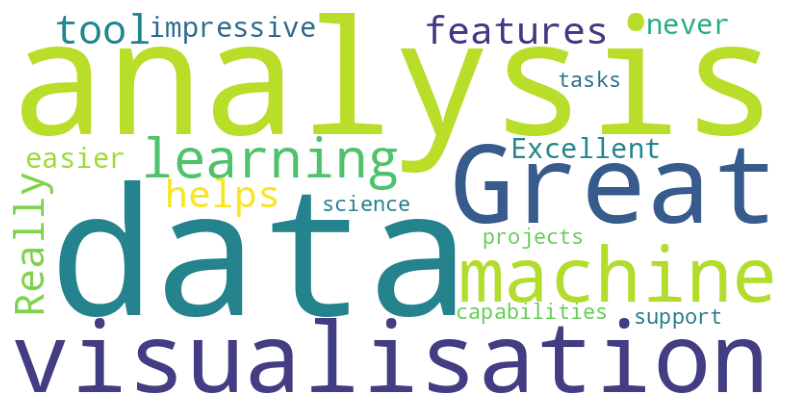

In [4]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         min_font_size=10).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Example text - multiple customer reviews
reviews = """
Great data visualisation tool! Really helps with analysis.
The machine learning features are impressive.
Data analysis has never been easier.
Excellent visualisation capabilities and machine learning support.
Great for data science projects and analysis tasks.
"""

create_wordcloud(reviews)

### 2.2 Sentiment Distribution

Visualising sentiment across multiple texts:

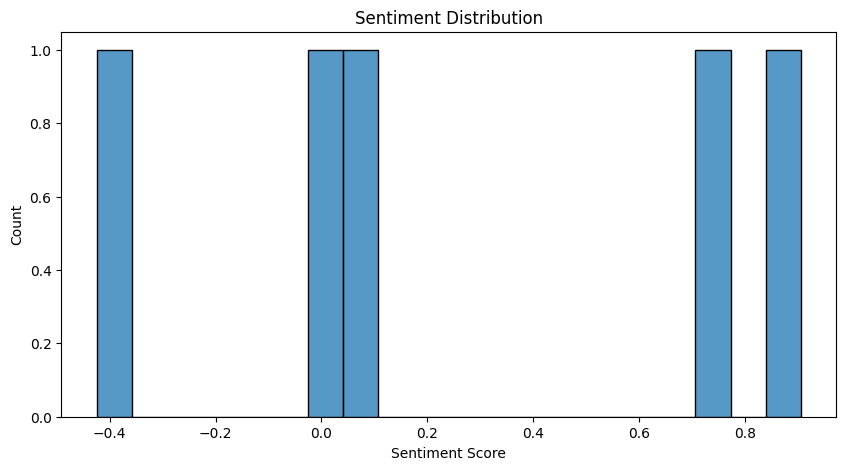

Average sentiment: 0.27


In [5]:
from textblob import TextBlob
import seaborn as sns

def analyse_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Example reviews
reviews = [
    "Excellent product, very satisfied!",
    "Not what I expected, disappointed.",
    "Good features but expensive.",
    "Amazing customer service!",
    "Needs improvement."
]

# Calculate sentiments
sentiments = [analyse_sentiment(review) for review in reviews]

# Create distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(sentiments, bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Print average sentiment
print(f"Average sentiment: {sum(sentiments)/len(sentiments):.2f}")

## Part 3: Applied Exercise - Customer Feedback Analysis

Let's build a complete analysis pipeline for customer feedback:

In [6]:
class FeedbackAnalyser:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')

    def analyse_feedback(self, feedback):
        # Basic metrics
        doc = self.nlp(feedback)
        word_count = len([token for token in doc if not token.is_punct])

        # Sentiment
        sentiment = TextBlob(feedback).sentiment.polarity

        # Key entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]

        # Key phrases (noun chunks)
        key_phrases = [chunk.text for chunk in doc.noun_chunks]

        return {
            'word_count': word_count,
            'sentiment': sentiment,
            'entities': entities,
            'key_phrases': key_phrases
        }

# Example usage
analyser = FeedbackAnalyser()

feedback = """
The new Data Science Pro software from TechCorp has transformed our analytics capabilities.
The machine learning features are impressive, though the visualisation tools need improvement.
Sarah from customer support was very helpful with the installation process.
"""

results = analyser.analyse_feedback(feedback)

print("Feedback Analysis Results:")
print(f"Word Count: {results['word_count']}")
print(f"Sentiment Score: {results['sentiment']:.2f}")
print("\nIdentified Entities:")
for entity, label in results['entities']:
    print(f"- {entity}: {label}")
print("\nKey Phrases:")
for phrase in results['key_phrases']:
    print(f"- {phrase}")

Feedback Analysis Results:
Word Count: 40
Sentiment Score: 0.45

Identified Entities:
- TechCorp: ORG
- Sarah: PERSON

Key Phrases:
- 
The new Data Science Pro software
- TechCorp
- our analytics capabilities
- The machine learning features
- the visualisation tools
- improvement
- Sarah
- customer support
- the installation process


### Your Turn!

Try analyzing some text from your organisation using the FeedbackAnalyser:

In [7]:
# Your code here
your_feedback = """
Replace this with your own text from customer feedback,
product documentation, or internal communications
"""

your_results = analyser.analyse_feedback(your_feedback)

# Analyze and visualize the results
# ...

## Summary

In this session, we've covered:
1. Advanced NLP concepts:
   - Part-of-speech tagging
   - Named Entity Recognition
2. Text visualisation techniques:
   - Word clouds
   - Sentiment distribution
3. Practical application with customer feedback analysis

### Next Steps
- Explore more advanced NLP techniques
- Try different visualisation libraries
- Apply these techniques to your own projects

### Additional Resources
- [spaCy Documentation](https://spacy.io/)
- [TextBlob Documentation](https://textblob.readthedocs.io/)
- [Seaborn Visualisation Guide](https://seaborn.pydata.org/)